In [32]:
# solution of qiskit quantum explorer - warm-up thread exercise 
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *
import numpy as np

In [33]:
#A 70/30 capping ratio on win and loose can be implemented by setting up 
#decision qubit in a fixed initial superpositon 
qc_1 = QuantumCircuit(1,1)
# we need to initialize amplitude associated with |0⟩ to root(7/10) that is cos(theta)/2  
theta = 2*(np.arccos(np.sqrt(7/10)))
probability0 = (np.cos(theta/2))**2
probability1 = (np.sin(theta/2))**2
print(' print angle in degrees', theta*180/np.pi)
print(probability0 + probability1)
# since phase is not going to change probabilities lets work with zero phase 
qc_1.ry(theta,0)  
qc_1.draw()

 print angle in degrees 66.42182152179817
1.0


┌────────────┐
  q: ┤ Ry(1.1593) ├
     └────────────┘
c: 1/══════════════

Statevector([0.83666003+0.j, 0.54772256+0.j],
            dims=(2,))


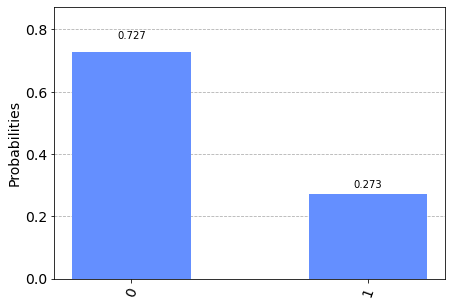

In [34]:
sv_backend = Aer.get_backend('statevector_simulator')
shots1 = 1
result1 = execute(qc_1, sv_backend).result()
sv = result1.get_statevector()
print(sv)

qc_1.measure([0],[0])
bkend = Aer.get_backend('qasm_simulator')
shots1 = 1000
result = execute(qc_1, bkend, shots=shots1).result()
counts=result.get_counts()
plot_histogram(result.get_counts())

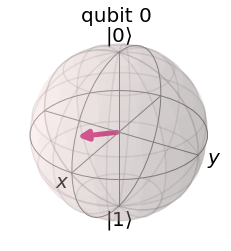

In [35]:
plot_bloch_multivector(sv)

In [36]:
# second excercise for a two qubits system, our task is to obtain a probability
# of 3/4 for state  '01', here 01 is assigned a specific goal   

qc2 = QuantumCircuit(2,2)
desired_prob_01 = 3/4
desired_amplitude_01 = np.sqrt(desired_prob_01)

# The amplitude of '01' state will be formed by product of amplitudes 
# associated with '0' is first qubit (msb) and '1' is second qubit
# lets chose both amps of '0' in msb and '1' in lsb as root(desired amplitude)

desired_amp_lsb_1 = np.sqrt(desired_amplitude_01)
desired_amp_msb_0 = np.sqrt(desired_amplitude_01)

# now we can calculate the theta angles associated with two qubits as 
theta_lsb_1 = 2*np.arcsin(desired_amp_lsb_1)
theta_msb_0 = 2*np.arccos(desired_amp_msb_0)

qc2.ry(theta_msb_0,1)
qc2.ry(theta_lsb_1,0)
#qc.h(1)

qc2.draw()

┌────────────┐
q_0: ─┤ Ry(2.3921) ├
     ┌┴────────────┤
q_1: ┤ Ry(0.74947) ├
     └─────────────┘
c: 2/═══════════════

0.7494688654174804 2.392123788172313 42.941402864879926 137.0585971351201


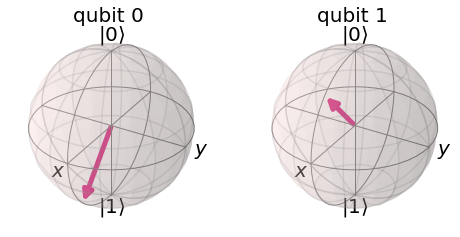

In [37]:
sv_backend = Aer.get_backend('statevector_simulator')
result = execute(qc2, sv_backend).result()
sv=result.get_statevector()
print(theta_msb_0, theta_lsb_1, theta_msb_0*(180/np.pi),  (theta_lsb_1*180)/np.pi)
plot_bloch_multivector(sv)

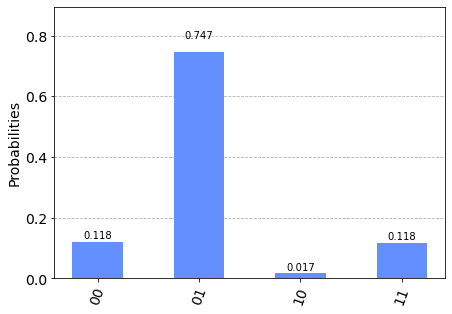

In [38]:
qc2.measure([0,1],[0,1])
bkend = Aer.get_backend('qasm_simulator')
shots = 10000
result1 = execute(qc2, bkend, shots=shots).result()
plot_histogram(result1.get_counts())

In [39]:
# now see if we can set qubits such that we can get the probability of state |10⟩ to .60 
qc3 = QuantumCircuit(2,2)
desired_prob_10 = 0.6
desired_amplitude_10 = np.sqrt(desired_prob_10)

desired_amp_lsb_0 = np.sqrt(desired_amplitude_10)
desired_amp_msb_1 = np.sqrt(desired_amplitude_10)

# now we can calculate the theta angles associated with two qubits as 
theta_lsb_0 = 2*np.arccos(desired_amp_lsb_0)
theta_msb_1 = 2*np.arcsin(desired_amp_msb_1)

qc3.ry(theta_msb_1,1)
qc3.ry(theta_lsb_0,0)

qc3.draw()

┌────────────┐
q_0: ┤ Ry(0.9894) ├
     ├────────────┤
q_1: ┤ Ry(2.1522) ├
     └────────────┘
c: 2/══════════════

2.152195000266765 0.9893976533230283 123.31169020444273 56.688309795557295


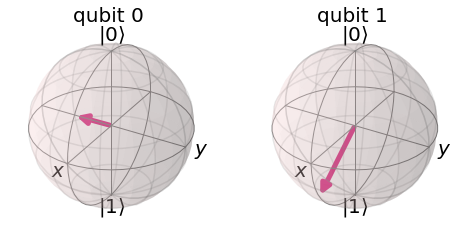

In [40]:
sv_backend = Aer.get_backend('statevector_simulator')
result = execute(qc3, sv_backend).result()
sv=result.get_statevector()
print(theta_msb_1, theta_lsb_0, theta_msb_1*(180/np.pi),  (theta_lsb_0*180)/np.pi)
plot_bloch_multivector(sv)

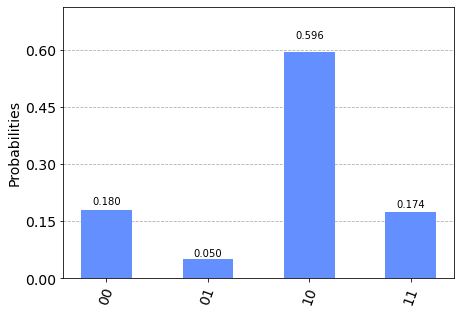

In [41]:
qc3.measure([0,1],[0,1])
bkend = Aer.get_backend('qasm_simulator')
shots = 10000
result1 = execute(qc3, bkend, shots=shots).result()
plot_histogram(result1.get_counts())

In [42]:
# we can take this idea further and try with three or other multi qubits setup
# however when multiple condition are to be met like prob of getting state |100⟩ = 0.75 and
# prob of getting state |101⟩ = 0.10, we need to check if it is consistent with 
# normalizatio constraint.   

# one can check what it mean by representing final states as product of multiple qubits
# with different coefficients and see if there are any contradictions
# see if you can set one qubit as equal superposition of |0⟩ and |1⟩ and 
# can still get the required amplitude of |01⟩ = as root(3/4)  

In [43]:
# end of program